In [73]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

X_train = pd.read_csv('https://github.com/limperstickhelp23/Credit_Fraud_Detection/blob/a4e466407b03d483be92a096bf9e6ecdf250dafb/preprocessing/X_train.csv?raw=True')

y_train = pd.read_csv('https://github.com/limperstickhelp23/Credit_Fraud_Detection/blob/a4e466407b03d483be92a096bf9e6ecdf250dafb/preprocessing/y_train.csv?raw=True' )
X_test = pd.read_csv('https://github.com/limperstickhelp23/Credit_Fraud_Detection/blob/a4e466407b03d483be92a096bf9e6ecdf250dafb/preprocessing/X_test.csv?raw=True')
y_test = pd.read_csv('https://github.com/limperstickhelp23/Credit_Fraud_Detection/blob/a4e466407b03d483be92a096bf9e6ecdf250dafb/preprocessing/y_test.csv?raw=True')

X_train.drop(['Unnamed: 0'], axis=1, inplace=True)
y_train.drop(['Unnamed: 0'], axis=1, inplace=True)
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)
y_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index= X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index= X_test.index)

In [75]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

C:\Users\jacob\.conda\envs\painter\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [76]:
y_pred = neigh.predict(X_test)

In [77]:
import numpy as np
from sklearn.metrics import classification_report


print(classification_report(y_test.is_fraud, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    276787
           1       0.79      0.46      0.58      1073

    accuracy                           1.00    277860
   macro avg       0.89      0.73      0.79    277860
weighted avg       1.00      1.00      1.00    277860



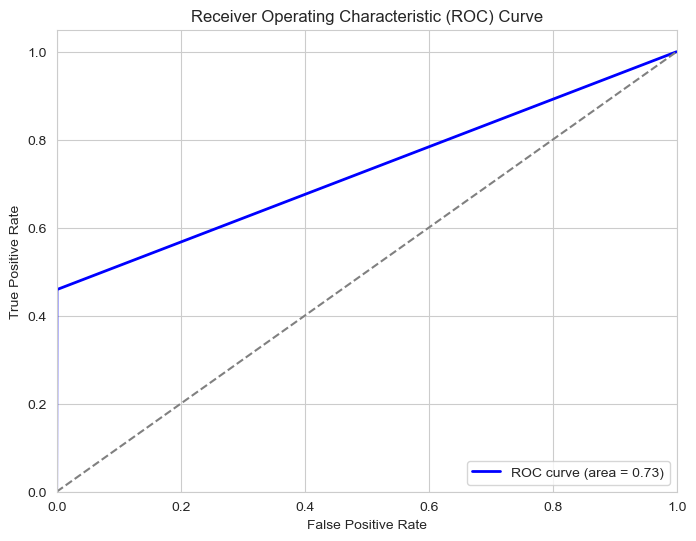

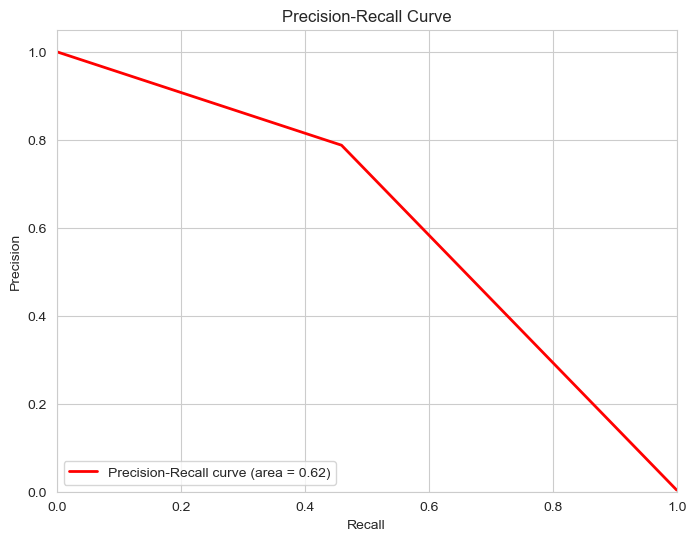

In [78]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test.is_fraud, y_pred)
roc_auc = auc(fpr, tpr)

# Compute Precision-Recall curve and area for the positive class
precision, recall, _ = precision_recall_curve(y_test.is_fraud, y_pred)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.show()

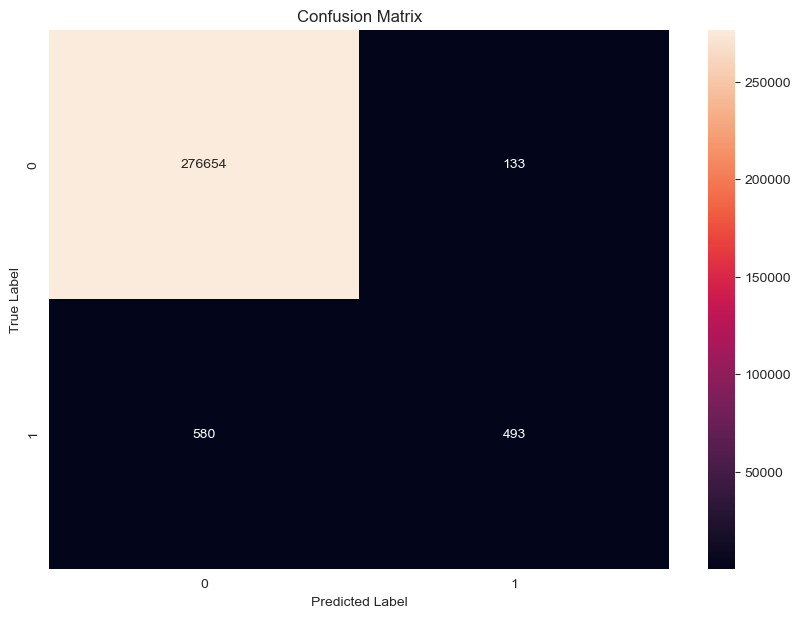

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()